### **Context**
Advertising is a type of marketing communication used to promote or sell products or services. Advertising is usually paid by sponsors and viewed through various media such as websites, apps, emails and other offline communications.
Android is the mobile operating system running on Google OS with about 69% of the market share worldwide. The Google Play Store is the Android app store used to install Android Apps.

Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store. They need to understand the trend of applications available on the google play store so that they can decide to focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit. As a Data Scientist, you are required to analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

The dataset provided contains information of over 4000+ apps across different categories along with other useful attributes like Ratings, Reviews etc.

### **Data Description:**

* App: Application Name
* Category: Category the app belongs to (`Others` category contain apps from various different categories excluded from the dataset)
* Rating: Overall user rating of the app
* Reviews: Number of user reviews for the app
* Size: Size of the app in kilobytes
* Installs: Number of user downloads/installs for the app
* Paid/Free: Whether an app is paid or free
* Price: price of an app in dollars
* Content Rating: Age group the app is targeted at
* Ad Supported: whether an app supports an Ad or not (Yes/No)
* In App Purchases: App containing in app purchase feature or not (Yes/No)
* Editors Choice: Whether rated as Editor Choice (Yes/No)

In [4]:
# Mount Drive from G drive
from google.colab import files
uploaded = files.upload()

Saving Play_Store_2.csv to Play_Store_2 (1).csv


**Importing all the necessary packages**

In [5]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Commands to help with graph displays
%matplotlib inline

#To display values upto 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)


In [6]:
# Get the dataset
import io
df = pd.read_csv("Play_Store_2.csv")

In [7]:
#Initial dataset review
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.90,160604.00,270.00,10000000.00,Free,0.00,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.40,NaN,46.00,100000.00,Free,0.00,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.00,29.00,100000.00,Free,0.00,Everyone,Yes,No,No
3,Ay,Others,NaN,11.00,36.00,5000.00,Free,0.00,Teen,Yes,No,No
4,EA Plus,Others,2.50,12.00,12.00,1000.00,Free,0.00,Everyone,No,No,No
5,Bt Notifier -Smartwatch notice,TOOLS,2.80,632.00,82.00,500000.00,Free,0.00,Everyone,No,No,No
6,SAMURAI vs ZOMBIES DEFENSE,GAME,4.50,312204.00,19.00,5000000.00,Free,0.00,Everyone,Yes,Yes,No
7,EM Launcher Pro,PERSONALIZATION,4.20,35.00,0.02,1000.00,Paid,3.99,Everyone,No,No,No
8,Draw In,GAME,4.20,46416.00,73.00,10000000.00,Free,0.00,Everyone,Yes,Yes,No
9,PUBG MOBILE LITE,Others,4.20,312204.00,270.00,19970000.00,Free,0.00,Teen,Yes,No,Yes


##Data Overview Process

The initial steps to get an overview of any dataset is to:

- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
get information about the number of rows and columns in the dataset

- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [8]:
#Shape of dataset
df.shape

(4153, 12)

In [9]:
#Data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


Insight from data types

- 4153 observations

- Missing / null values in columns: Rating & Review

- dtypes: float64(5), object(7)

In [10]:
#Get statistical summary for the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,4153,4153,War Dragons,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4153,15,Others,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3976.00,NaN,NaN,NaN,4.19,0.52,1.00,4.00,4.30,4.50,5.00
Reviews,4029.00,NaN,NaN,NaN,66964.21,107418.85,1.00,224.00,7461.00,78219.00,312204.00
Size,4153.00,NaN,NaN,NaN,82.25,92.26,0.01,22.00,42.00,84.00,270.00
Installs,4153.00,NaN,NaN,NaN,3232705.64,5421343.28,1.00,10000.00,500000.00,5000000.00,19970000.00
Paid/Free,4153,2,Free,3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4153.00,NaN,NaN,NaN,0.57,8.93,0.00,0.00,0.00,0.00,399.99
Content Rating,4153,4,Everyone,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,4153,2,Yes,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Insight from statistical summary

- The mean of Apps rating is 4.19

- Free apps are 3828/4153, around 92% of apps are free

- In App Purchases make 2586/4153, around 60% of apps use it

- Most Editors don't recommend apps with 80% are nto recommended

In [11]:
#Examine Missing values

df.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

- The variable Rating and Reviews have 223 and 127 missing values in them
- There are no missing values in other variables.

## Handling Missing Data

- Rating column we can use the mean of columns to impute the values as it is close to the median of the columns.

- Review column we have to use the average review of that column as the median range is too high otherwise it will skew the data.

In [12]:
# Rating - use the mean to impute the misisng data
df['Rating'] = df['Rating'].fillna(value = df['Rating'].mean())

In [13]:
df['Reviews'] = df['Reviews'].fillna(value = df['Reviews'].median())

In [14]:
#Review changes to the Rating column
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [15]:
df.duplicated().sum()

0

#Summary

- Initial inspection of data completed
- Statsitics and shaped checked
- Data types checked
- Missing values handled
- Checked duplicates

Can continue to the EDA process to further investigate the relationship between the data and business question.  

-----------------------------------------------------------

#Exploratory Data Analysis

key question to answer: **What trends of categories can be beneficial for investors?**

Process of EDA:

- Univariate Analysis: numerical variables

- Bivariate Analysis: relationship of categories

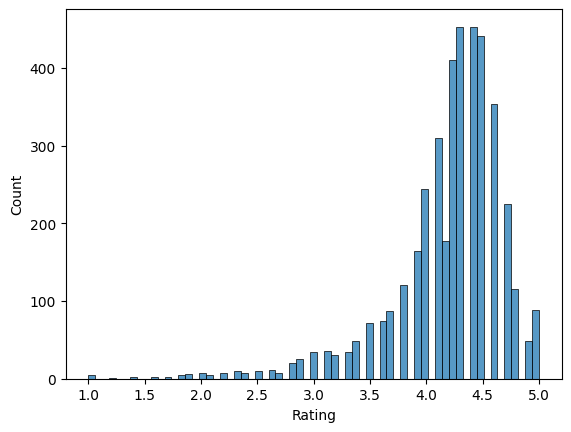

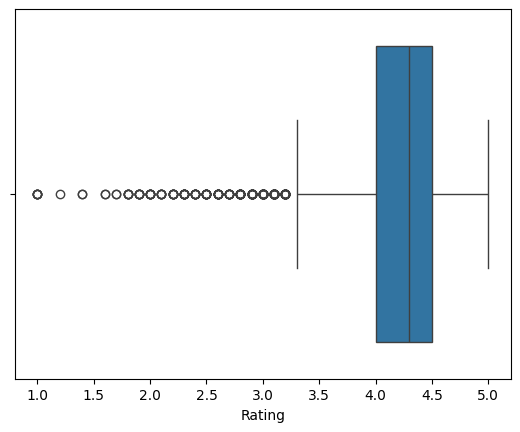

In [16]:
#Observations on Ratings
sns.histplot(data=df,x='Rating')
plt.show()
sns.boxplot(data=df,x='Rating')
plt.show()

In [17]:
# top 10 Ratings values counts
df['Rating'].value_counts().head(10)

4.40    453
4.30    453
4.50    441
4.20    410
4.60    353
4.10    310
4.00    244
4.70    225
4.19    177
3.90    164
Name: Rating, dtype: int64

df['Rating'].values_count()

##Insight

- Majority of the ratings are from 4.00 to 4.60

- The distribution is heavily left skewed

- There are a lot of outliers in this variable


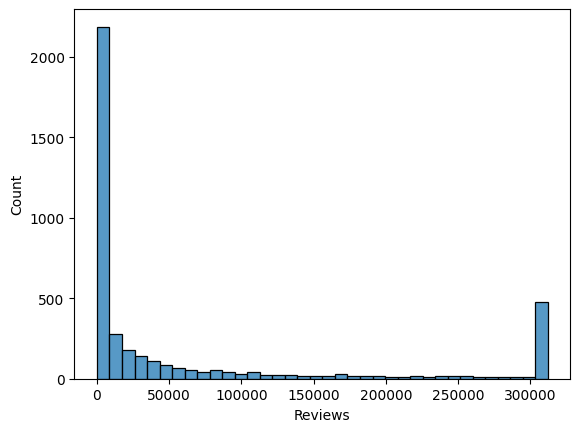

<Axes: xlabel='Reviews'>

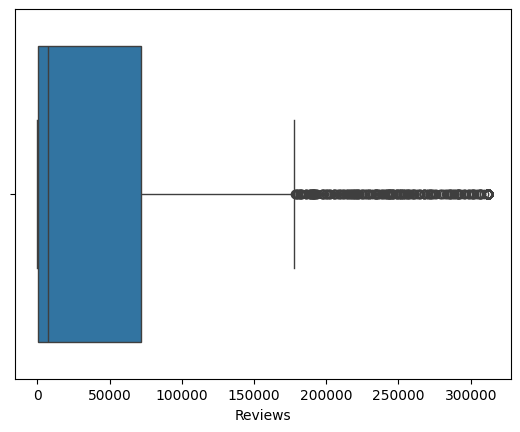

In [18]:
#Observations on Reviews
sns.histplot(data =df, x = "Reviews")
plt.show()
sns.boxplot(data = df, x = "Reviews")

##Insight

- Distribution is highly right skewed
- Most reviews are low between 0 - 10,000
- A lot of outliers

--------------------------------------------------------------------------------

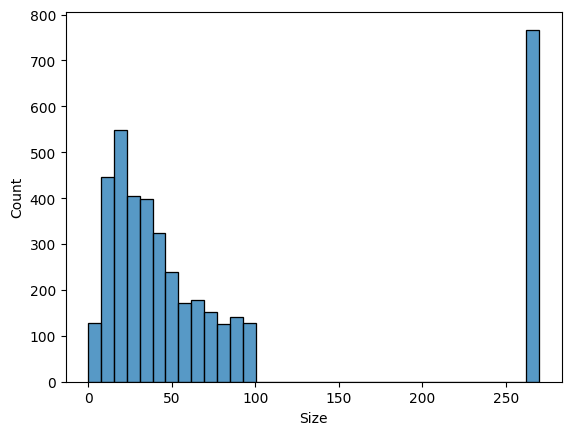

<Axes: xlabel='Size'>

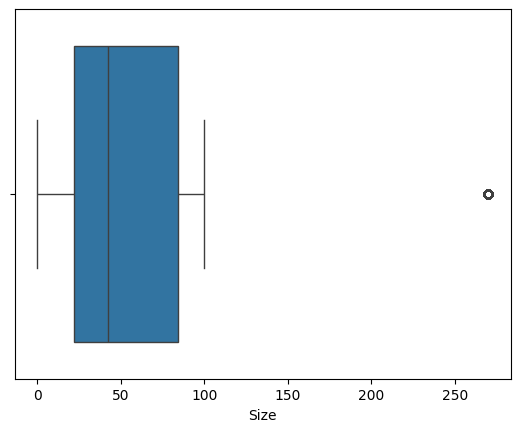

In [20]:
# Obersavtions from Size
sns.histplot(data = df, x = "Size")
plt.show()
sns.boxplot(data =df, x = "Size")

#Insight

- The distribution of Sizeis distributed between 0 - 100 kb, meaning most apps fall in this range

- Some larger apps fall into megabytes on the far right end as outlier.

------------------------------------------------------------------

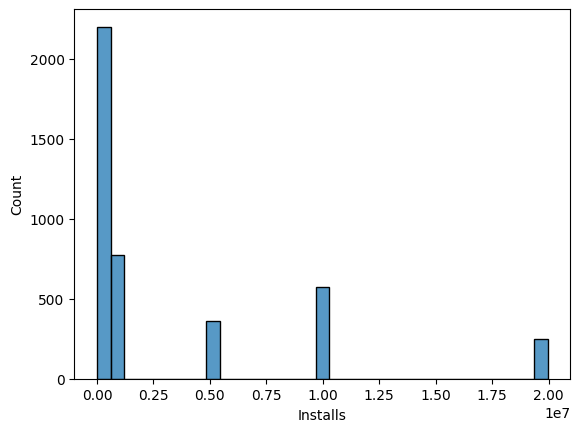

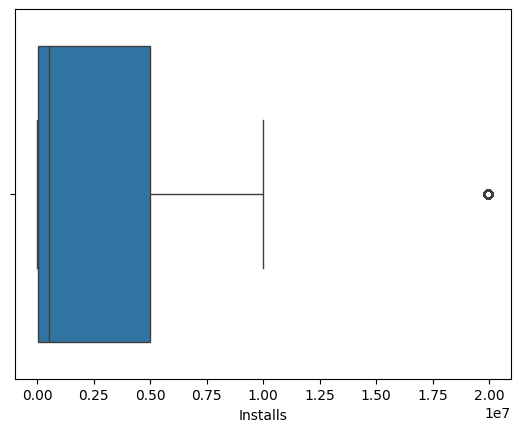

In [21]:
#Observations on Installs
sns.histplot(data = df, x = "Installs")
plt.show()
sns.boxplot(data = df, x = "Installs")
plt.show()


# Insight

- Installs appear to be installed within the 0.00 - 0.15 range

- Outliers for 1.8 - 2.00


--------------------------------------------------

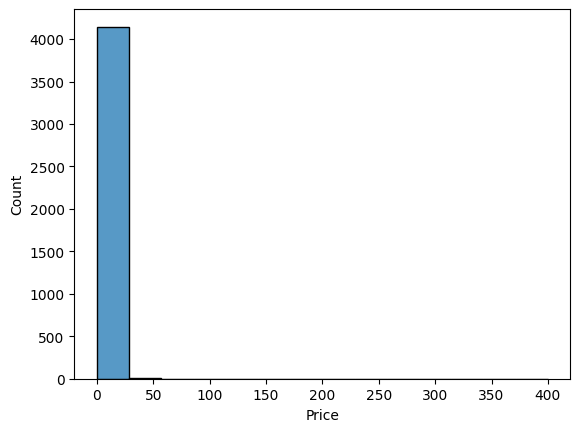

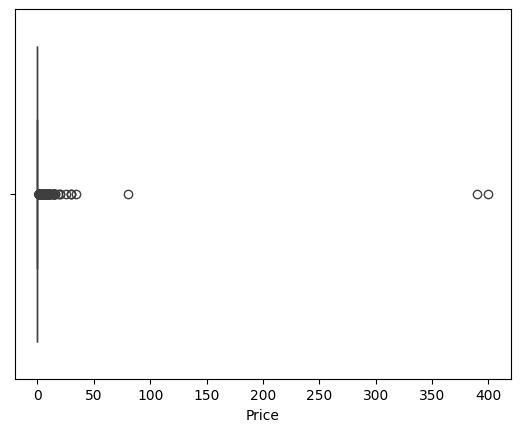

In [22]:
#Observation on Price
sns.histplot(data = df, x = "Price")
plt.show()
sns.boxplot(data = df, x = "Price")
plt.show()

#Insight

- Most of the apps are free to use, with a few paid apps as outliers.


--------------------------------------------------------------

##Investigating the univariate categorical columns  

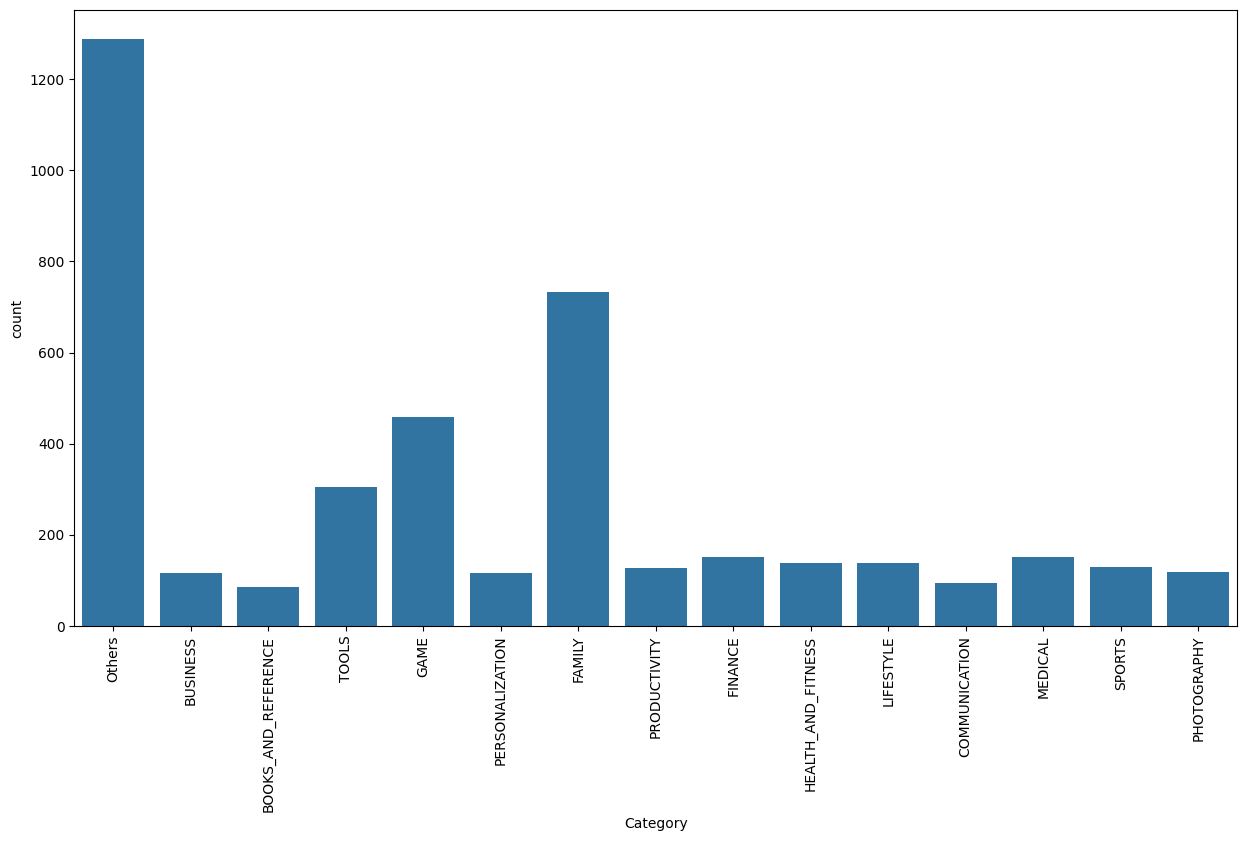

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = "Category")
plt.xticks(rotation=90);